# 1. Setup  

In [2]:
import networkx as nx
from scipy.stats import pearsonr

from curvatures import steinerbergerCurvature, lly_curvature

# 2. Comparison between curvatures

We compare the values of the Steinerberger curvature and the Lin-Lu-Yau curvature on different random graphs

In [3]:
def compare_edge_average(N,n,q):
    """Compare the Steinerberger curvature to the Lin-Lu-Yau curvature by averaging the Steinerberger curvature of the two endpoints of an edge

    Args:
        N (int): Number of graphs
        n (int): Number of vertices in the Erdos-Renyi graph
        q (float): Probability for edge creation
    """
    pearson_correlation = []
    for _ in range(N):
        G=nx.erdos_renyi_graph(n=n, p=q)
        while not nx.is_connected(G):
            G=nx.erdos_renyi_graph(n=n, p=q)
            print("Disconnected Graph encountered")

        llyCurv = lly_curvature(G)
        steinerbergerCurv = steinerbergerCurvature(G)
        avg_steinerberger_curv = []
        llyCurvList = []
        edges_covered = []
        for edge in llyCurv.keys():
            if not edge in edges_covered:
                average_steinerberger_curv = 0.5*(steinerbergerCurv[edge[0]] + steinerbergerCurv[edge[1]])
                avg_steinerberger_curv.append(average_steinerberger_curv)
                llyCurvList.append(llyCurv[edge])
                edges_covered.append((edge[1], edge[0]))
       
        r, p = pearsonr(llyCurvList, avg_steinerberger_curv)
        
        pearson_correlation.append(r)
    return pearson_correlation

In [4]:
def compare_vertex_average(N,n,q):
    """Compare the Steinerberger curvature to the Lin-Lu-Yau curvature by averaging the Lin-Lu-Yau curvature of all edges adjacent to a given vertex

    Args:
        N (int): Number of graphs
        n (int): NUmber of vertices in the Erdos-Renyi graph
        q (float): Probability of edge creation
    """
    pearson_correlation = []
    for _ in range(N):
        G = nx.erdos_renyi_graph(n=n,p=q)
        while not nx.is_connected(G):
            G=nx.erdos_renyi_graph(n=n, p=q)
            print("Disconnected Graph encountered")
        llyCurv = lly_curvature(G)
        steinerbergerCurv = steinerbergerCurvature(G)
        llyCurv_vertex = []
        for i in range(n):
            lly_curv_average = 0
            for j in range(n):
                if G.has_edge(i,j):
                    lly_curv_average += llyCurv[(i,j)]
            lly_curv_average /= G.degree(i)
            llyCurv_vertex.append(lly_curv_average)
        r, p = pearsonr(llyCurv_vertex, steinerbergerCurv)   
        pearson_correlation.append(r)
    return pearson_correlation

## 2.1 Erdős–Rényi model

### 2.1.1 Averaging over endpoints of an edge

In [10]:
N, n, q = 10, 10, 0.5
compare_edge_average(N=N,n=n, q=q)

[np.float64(0.42430098019624174),
 np.float64(-0.15893605374836509),
 np.float64(-0.2925479782480521),
 np.float64(0.23596954972512682),
 np.float64(0.2238547264327692),
 np.float64(0.24830542624130453),
 np.float64(-0.3795000748755613),
 np.float64(0.20421474296874395),
 np.float64(-0.17965352035849277),
 np.float64(-0.12817606220332575)]

In [5]:
N, n, q = 10, 10, 0.6
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.2797807528828695),
 np.float64(-0.07576140496628729),
 np.float64(-0.22623850626587325),
 np.float64(-0.01815813787190733),
 np.float64(0.2674106311418746),
 np.float64(-0.17986924992127368),
 np.float64(-0.2914597668259364),
 np.float64(-0.20474636748651304),
 np.float64(-0.10496221191918542),
 np.float64(0.06141742063785948)]

In [9]:
N, n, q = 10, 10, 0.7
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.057868963142011155),
 np.float64(-0.38823350855434624),
 np.float64(-0.22302824774483893),
 np.float64(-0.11271361665570645),
 np.float64(-0.18787435819662837),
 np.float64(-0.07276488660964225),
 np.float64(0.015054984826656743),
 np.float64(-0.2584050938393682),
 np.float64(-0.0730507883543393),
 np.float64(-0.08576410452570024)]

In [11]:
N, n, q = 10, 20, 0.5
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.03669430561416865),
 np.float64(0.06648560278955576),
 np.float64(-0.13172088176483818),
 np.float64(-0.16616995603365164),
 np.float64(0.10596534527936467),
 np.float64(-0.11925135729960407),
 np.float64(-0.15357538999551226),
 np.float64(-0.059215370243819544),
 np.float64(-0.18067806396406438),
 np.float64(-0.2603895808848572)]

In [7]:
N, n, q = 10, 20, 0.6
compare_edge_average(N=N,n=n, q=q)

[np.float64(0.038985771535817976),
 np.float64(0.1734792296130449),
 np.float64(0.027706924323001376),
 np.float64(0.007255954544591406),
 np.float64(0.09581611930632108),
 np.float64(-0.1877142271269428),
 np.float64(-0.009641071155252654),
 np.float64(-0.06880384827329553),
 np.float64(-0.13451522585301864),
 np.float64(-0.23901081193734053)]

In [8]:
N, n, q = 10, 20, 0.7
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.015658973357300716),
 np.float64(-0.3595266654235076),
 np.float64(-0.0657056828399864),
 np.float64(-0.18730613678213473),
 np.float64(-0.016384389262432904),
 np.float64(-0.09862590928286212),
 np.float64(-0.22605055479105662),
 np.float64(-0.10127710684852224),
 np.float64(0.05217079319434463),
 np.float64(-0.3011298383692389)]

### 2.1.2 Averaging over adjacent edges

In [12]:
N, n, q = 10, 10, 0.5
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.05352453391632968),
 np.float64(0.4105680715210036),
 np.float64(-0.25426225654110235),
 np.float64(0.25868885360876387),
 np.float64(0.22450033110527254),
 np.float64(0.32083902304087225),
 np.float64(0.3008409767446819),
 np.float64(-0.1646814211584376),
 np.float64(0.25182953108601597),
 np.float64(0.04663707991546824)]

In [13]:
N, n, q = 10, 10, 0.6
compare_vertex_average(N=N,n=n, q=q)

[np.float64(0.02735540805052154),
 np.float64(0.003319368239808912),
 np.float64(0.1939991845496125),
 np.float64(-0.1655027286609075),
 np.float64(-0.20614260943011348),
 np.float64(-0.3406349408014726),
 np.float64(-0.45912207472841543),
 np.float64(-0.06852299499606049),
 np.float64(-0.11330246532963559),
 np.float64(0.12533307555285195)]

In [15]:
N, n, q = 10, 10, 0.7
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.3005213214121122),
 np.float64(-0.8594214959835683),
 np.float64(-0.3006758539441868),
 np.float64(-0.3708697381251771),
 np.float64(0.2451736461928996),
 np.float64(-0.0979597954881687),
 np.float64(-0.1575244081479311),
 np.float64(-0.2756450179743144),
 np.float64(-0.47051660014168467),
 np.float64(0.01529967113212885)]

In [16]:
N, n, q = 10, 20, 0.5
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.06791594703144622),
 np.float64(-0.10659390022378151),
 np.float64(0.05149975415428631),
 np.float64(-0.24728590678473755),
 np.float64(0.16700851317206497),
 np.float64(-0.1005175765926297),
 np.float64(-0.1621752977015499),
 np.float64(-0.08875255387464359),
 np.float64(-0.1836505984654909),
 np.float64(-0.13532421926960042)]

In [17]:
N, n, q = 10, 20, 0.6
compare_vertex_average(N=N,n=n, q=q)

[np.float64(0.02245542499822349),
 np.float64(-0.13044106238843028),
 np.float64(-0.3774269197631887),
 np.float64(-0.08275447205072346),
 np.float64(-0.15951821475728437),
 np.float64(0.009751061708742709),
 np.float64(-0.04898629773377189),
 np.float64(-0.23222839994384475),
 np.float64(-0.24662358818873725),
 np.float64(-0.004091155340857709)]

In [18]:
N, n, q = 10, 20, 0.7
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.43809934795157124),
 np.float64(-0.021719610754632544),
 np.float64(-0.2317809412445701),
 np.float64(0.32430599303765345),
 np.float64(-0.09346136940880612),
 np.float64(-0.25743962638284296),
 np.float64(0.001481504500520578),
 np.float64(-0.015583673159788293),
 np.float64(0.12865135126304827),
 np.float64(-0.3907909840088652)]

[0, 1, 2, 3]


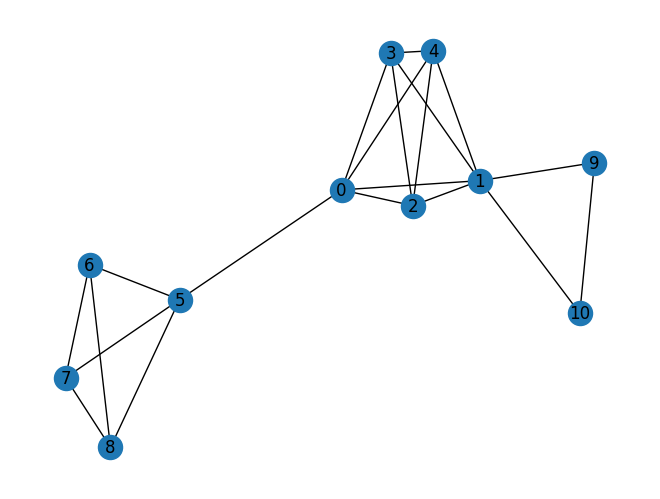

In [60]:
G1 = nx.complete_graph(4)
G2 = nx.complete_graph(5)
print(G1.nodes())
G1 = nx.relabel_nodes(G1, mapping={0:5, 1:6, 2:7, 3: 8})
G = nx.union(G1, G2)
G.add_edge(0, 5)
G.add_edges_from([(1,9), (9,10), (10,1)])
nx.draw(G, with_labels=True)

In [61]:
llyCurv = lly_curvature(G)
steinerbergerCurv = steinerbergerCurvature(G)
avg_steinerberger_curv = []
llyCurvList = []
edges_covered = []
for edge in llyCurv.keys():
    if not edge in edges_covered:
        average_steinerberger_curv = 0.5*(steinerbergerCurv[edge[0]] + steinerbergerCurv[edge[1]])
        avg_steinerberger_curv.append(average_steinerberger_curv)
        llyCurvList.append(llyCurv[edge])
        edges_covered.append((edge[1], edge[0]))
print(avg_steinerberger_curv)

[np.float64(1.3322676295501878e-15), np.float64(1.7763568394002505e-15), np.float64(2.220446049250313e-15), np.float64(-1.1134969325153357), np.float64(1.0122699386503071), np.float64(1.0122699386503076), np.float64(1.012269938650308), np.float64(-1.552147239263801), np.float64(-0.20245398773006174), np.float64(-0.2024539877300624), np.float64(-0.2024539877300604), np.float64(-0.5398773006134954), np.float64(-0.539877300613496), np.float64(-0.539877300613494), np.float64(-0.26993865030674624), np.float64(-0.269938650306746), np.float64(0.8098159509202432), np.float64(0.8098159509202452), np.float64(0.8098159509202445), np.float64(1.3496932515337423)]


In [62]:
llyCurvList

[0.8333333333333335,
 0.8333333333333335,
 0.8333333333333335,
 -1.0999999999999996,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 0.3333333333333348,
 0.8500000000000005,
 0.8500000000000005,
 0.8500000000000008,
 0.5833333333333335,
 0.5833333333333335,
 0.5833333333333335,
 0.16666666666666696,
 0.16666666666666696,
 1.25,
 1.25,
 1.25,
 1.5]

In [63]:
steinerbergerCurv

array([-1.21472393, -1.88957055,  0.80981595,  0.80981595,  0.80981595,
       -1.01226994,  1.01226994,  1.01226994,  1.01226994,  1.34969325,
        1.34969325])